In [1]:
from nba_api.stats.static import players,teams

In [21]:
id_query = players.find_players_by_full_name("zion williamson")[0]['id']

In [22]:
import requests
import pandas as pd

season = "2019-20"
player_id = f"{id_query}"
game_type = "Regular+Season" #Playoffs Regular+Season

url = f"https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=44&CFPARAMS={season}&ClutchTime=&Conference=&ContextFilter=\
&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&\
GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&\
PlayerID={player_id}&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&\
Season={season}&SeasonSegment=&SeasonType={game_type}&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&\
VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID="

headers = {
        'Host': 'stats.nba.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'x-nba-stats-origin': 'stats',
        'x-nba-stats-token': 'true',
        'Connection': 'keep-alive',
        'Referer': 'https://stats.nba.com/',
        'Pragma': 'no-cache',
        'Cache-Control': 'no-cache',
    }


response = requests.get(url,headers = headers)


columns = response.json()['resultSets'][0]['headers'] 

row_data = response.json()['resultSets'][0]['rowSet'] 

df = pd.DataFrame(columns=columns)

for idx,row in enumerate(row_data):
    df.loc[idx] = row

df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900663,35,1629627,Zion Williamson,1610612740,New Orleans Pelicans,1,8,32,...,Center(C),Less Than 8 ft.,1,-9,5,1,0,20200122,NOP,SAS
1,Shot Chart Detail,0021900663,192,1629627,Zion Williamson,1610612740,New Orleans Pelicans,2,10,35,...,Center(C),Less Than 8 ft.,1,-9,6,1,1,20200122,NOP,SAS
2,Shot Chart Detail,0021900663,384,1629627,Zion Williamson,1610612740,New Orleans Pelicans,3,9,10,...,Center(C),Less Than 8 ft.,1,14,10,1,1,20200122,NOP,SAS
3,Shot Chart Detail,0021900663,520,1629627,Zion Williamson,1610612740,New Orleans Pelicans,4,11,45,...,Center(C),Less Than 8 ft.,6,3,60,1,0,20200122,NOP,SAS
4,Shot Chart Detail,0021900663,562,1629627,Zion Williamson,1610612740,New Orleans Pelicans,4,8,52,...,Center(C),24+ ft.,26,13,264,1,1,20200122,NOP,SAS


In [23]:
df_made = df[df["SHOT_MADE_FLAG"]==1]
df_miss = df[df["SHOT_MADE_FLAG"]==0]

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Circle, Rectangle, Arc
from datetime import date
import numpy as np
%matplotlib inline

In [25]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 137, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 137, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [26]:
today = date.today()
rcParams['axes.unicode_minus']=False # 解决负号'-'显示为方块的问题
myfont_one = FontProperties(fname='/Users/leiyunong/Desktop/my_fonts/华康少女体.ttf') #设置中文字体路径
myfont_two = FontProperties(fname='/Users/leiyunong/Desktop/my_fonts/SimHei.ttf')

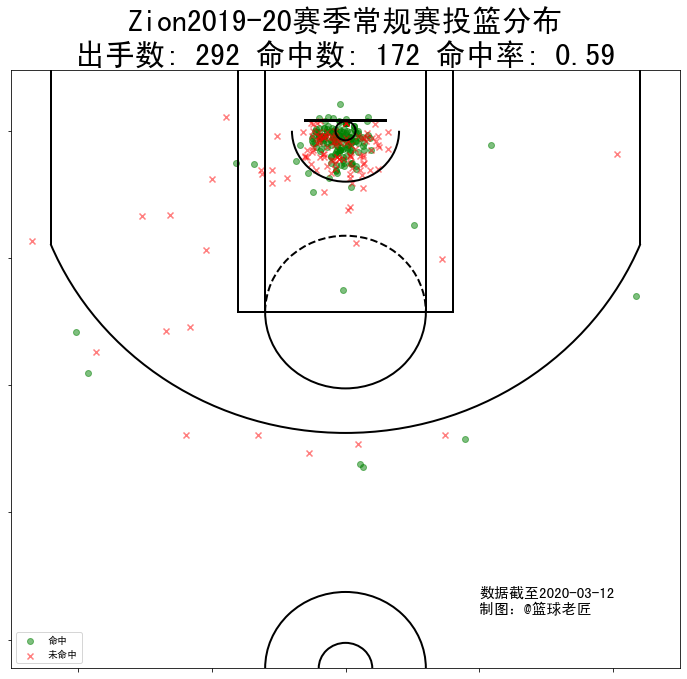

In [27]:
fig1,ax1 = plt.subplots(figsize=(12,11))

ax1.set_xlim(-250,250)

ax1.set_ylim(422.5, -47.5)

ax1.scatter(df_made.LOC_X, df_made.LOC_Y, color="green",label="命中",alpha=0.5)

ax1.scatter(df_miss.LOC_X, df_miss.LOC_Y, color="red",marker = "x", label="未命中",alpha=0.5)

draw_court()

ax1.set_title(f"Zion2019-20赛季常规赛投篮分布\n出手数: {len(df)} 命中数: {len(df_made)} 命中率: {np.round(len(df_made)/len(df),2)}",fontproperties=myfont_two,size=30)

ax1.text(100,380,f"数据截至{today}\n制图：@篮球老匠",fontproperties=myfont_two,size=15)

ax1.tick_params(labelbottom=False, labelleft=False)

ax1.legend(prop = myfont_two)

plt.show()
fig1.savefig("Zion.png",quality=100)

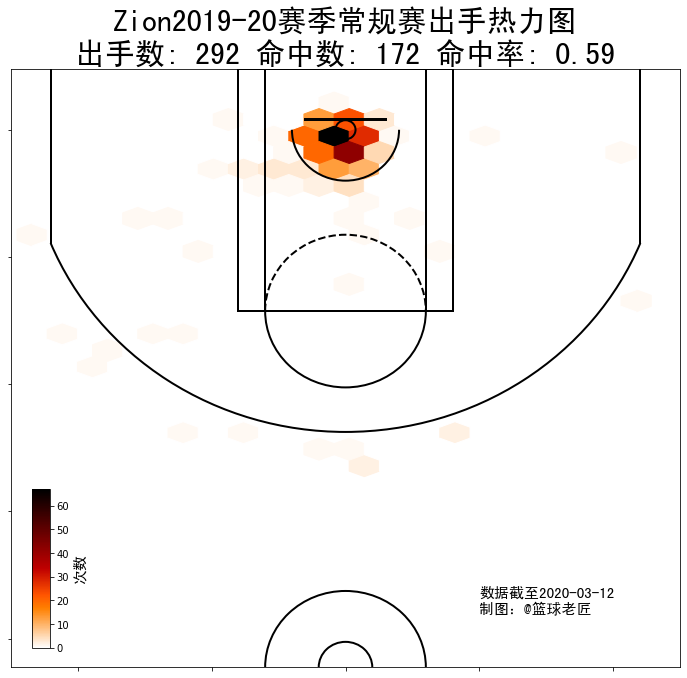

In [10]:
fig2,ax2 = plt.subplots(figsize=(12,11))

ax2.set_xlim(-250,250)

ax2.set_ylim(422.5, -47.5)

hb = ax2.hexbin(df.LOC_X, df.LOC_Y,cmap=plt.cm.gist_heat_r,gridsize = 20)

draw_court()

ax2.text(-100,220,"",fontproperties=myfont_two,size=30)

cbaxes = fig2.add_axes([0.15, 0.15, 0.02, 0.2]) 

cb = fig2.colorbar(hb, ax=ax2, cax = cbaxes)

cb.set_label('次数',fontproperties=myfont_two,size=15)

ax2.set_title(f"Zion2019-20赛季常规赛出手热力图\n出手数: {len(df)} 命中数: {len(df_made)} 命中率: {np.round(len(df_made)/len(df),2)}",fontproperties=myfont_two,size=30)

ax2.text(100,380,f"数据截至{today}\n制图：@篮球老匠",fontproperties=myfont_two,size=15)

ax2.tick_params(labelbottom=False, labelleft=False)

plt.show()


In [ ]:
fig1.savefig("harden.png",quality=100)
#fig2.savefig("ja4.png",quality=100)

In [ ]:
print(f"出手数: {len(df)} 命中数: {len(df_made)} 投失数: {len(df_miss)} 命中率: {np.round(len(df_made)/len(df),2)}")